# This notebook will cover the parameterization of small molecules and polymers

Parameterization is carried out using AmberTools and GAFF (generalized amber forcefield)

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class as detailed in the first tutorial.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. Examples on using this class will be found below.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

Set up the manager as was done in tutorial 1 using the **SnippetSimManage** class.

# Setting up *Manager* and *Builder* classes

In [2]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

Now set up a 'builder' variable using the **BuildAmberSystems** class and pass the manager class to it.

In [3]:
builder = BuildAmberSystems(manager)

The builder has many functions but we will start with some simple ones. The first task is to build a molecule in .pdb format and generate a unique residue code for it. Generating a unique residue code will allow us to track it in different simulations and help identifying molecules of interest when analysing any simulations.

As an example; generate a pdb file for caffeine using its SMILES string **CN1C=NC2=C1C(=O)N(C(=O)N2C)C**
<div align="center">
  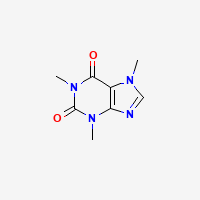
</div>


In [4]:
# A method to generate a pdb file and assign a unique residue code to it

# Example Usage:
# builder.SmilesToPDB_GenResCode("SMILES string", "Molecule Name")

builder.SmilesToPDB_GenResCode('CN1C=NC2=C1C(=O)N(C(=O)N2C)C', 'caffeine')

In [5]:
# Now we can check if this .pdb file exists using a method from tutorial 1
pdb_file = manager.load_pdb_filepath("caffeine")

# Print the pdb filepath
print(pdb_file)

/home/dan/polymersimulator/pdb_files/caffeine.pdb


# 1. Parameterizing small molecules

Now we can parameterize the caffeine molecule using the builder. This will generate a series of files in that specific molecules folder (.frcmod, .lib, .mol2, .prepi). Some of these are generated by default, but the .prepi and .frcmod file are extremely important for generating parameter files for molecular dynamics.

In [6]:
# Method to parameterize a small molecule

# Example Usage:
# builder.parameterize_mol("Molecule Name")

builder.parameterize_mol("caffeine")

Output: 
Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
Info: Determining atomic numbers from atomic symbols which are case sensitive.
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Running: /home/dan/miniconda3/envs/AmberTools23/bin/bondtype -j full -i ANTECHAMBER_BOND_TYPE.AC0 -o ANTECHAMBER_BOND_TYPE.AC -f ac

Running: /home/dan/miniconda3/envs/AmberTools23/bin/atomtype -i ANTECHAMBER_AC.AC0 -o ANTECHAMBER_AC.AC -p gaff
Info: Total number of electrons: 102; net ch

In [7]:
# When a molecule is parameterized a .mol2 file will be generated - we can check if this exists using a method from tutorial 1
# Method to return a single, specific mol2 file - pass a molecule name as a string
mol2_file = manager.load_mol2_filepath("caffeine")

# Print the mol2 filepath
print(mol2_file)

/home/dan/polymersimulator/pdb_files/molecules/caffeine/caffeine.mol2


# 2. Parameterizing polymers

Generating the parameters of polymers is little more complex. The first thing we will require is the parameterized trimer - this will allow for the creation of 3 polymeric units (head, mainchain, tail) which can later be used to construct larger polymers. This example will use a 3HB trimer.

First of all, we need its SMILES string **CC(CC(=O)OC(C)CC(=O)OC(C)CC(=O)O)O** and to generate the pdb file as was done for caffeine.
<div align="center">
  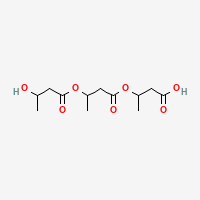
</div>

We will first build the trimer of our polymer from its SMILES string to generate a residue code.

In [8]:
# A method to generate a pdb file and assign a unique residue code to it
builder.SmilesToPDB_GenResCode('CC(CC(=O)OC(C)CC(=O)OC(C)CC(=O)O)O ', '3HB_trimer')

In [9]:
# Now we can check if this .pdb file exists using a method from tutorial 1
pdb_file = manager.load_pdb_filepath("3HB_trimer")

# Print the pdb filepath
print(pdb_file)

/home/dan/polymersimulator/pdb_files/3HB_trimer.pdb


We can parameterize this molecule in the same way as caffeine.

In [10]:
# Method to parameterize a small molecule

# Example Usage:
# builder.parameterize_mol("Molecule Name")

#builder.parameterize_mol("3HB_trimer")

However, an oversight was made during the generation of this code and the method for small molecules is not the same as for polymers. We need to start from a pdb file generated by hand in gaussview. 

*Note: it seems pointless to generate the pdb initially, but we still need to assign it a residue code*

We need to place the contents of a gaussview pdb file into the generated pdb file for the trimer and visualise it.

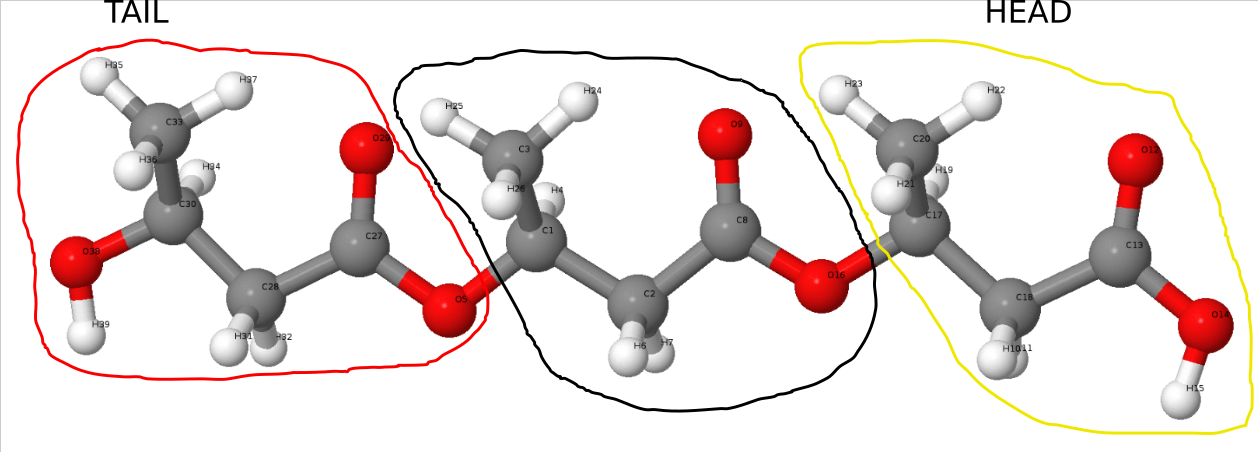

Now we can look at what sections make up the 3 polymeric units - i.e. a 'Head', 'mainchain' and 'tail' unit. This allows us to generate 3 .txt files labelled as so:

1. head_3HB_trimer.txt
2. mainchain_3HB_trimer.txt
3. tail_3HB_trimer.txt <br>
(these 3 files are contained in the repository in the path shown below as examples)

Before showing the format of these files - these will be saved in **/home/dan/polymersimulator/pdb_files/molecules/3HB_trimer**

These 3 files tell the code what atoms comprise each unit and will take the .pdb file as an input and return 3 .prepi files that can be used by amber to build bigger polymers.

The format for the **head_3HB_trimer.txt** file is as follows:

*MAIN_CHAIN C13* <br>
*MAIN_CHAIN C18* <br>
*TAIL_NAME     C17* <br>

*POST_TAIL_TYPE os* <br>

*CHARGE 0.0* <br>

*OMIT_NAME C3* <br>
*OMIT_NAME H24* <br>
*OMIT_NAME H25* <br>
*OMIT_NAME H26* <br>
*OMIT_NAME C1* <br>
*OMIT_NAME H4* <br>
*OMIT_NAME C2* <br>
*OMIT_NAME H6* <br>
*OMIT_NAME H7* <br>
*OMIT_NAME C8* <br>
*OMIT_NAME O9* <br>
*OMIT_NAME O16* <br>

*OMIT_NAME H39* <br>
*OMIT_NAME O38* <br>
*OMIT_NAME C30* <br>
*OMIT_NAME H34* <br>
*OMIT_NAME C33* <br>
*OMIT_NAME H35* <br>
*OMIT_NAME H36* <br>
*OMIT_NAME H37* <br>
*OMIT_NAME C28* <br>
*OMIT_NAME H31* <br>
*OMIT_NAME H32* <br>
*OMIT_NAME C27* <br>
*OMIT_NAME O29* <br>
*OMIT_NAME O5* <br>

To generate this file for the **head** unit, look at the atom numbers in gaussview and follow the steps below:

1. Identify atoms in the main chain and write the following lines for each atom: <br>
       *MAIN_CHAIN C13* - where you include each atom of the mainchain
2. Identify the final mainchain atom in your unit and lable it as the tail atom: <br>
       *TAIL_NAME C17*

*Note: For the **head** unit you will have a **TAIL_NAME**, for the **tail** unit you will have a **HEAD_NAME** and for the **mainchain** unit you will have both a **HEAD_NAME** and a **TAIL_NAME***

3. Identify the type of atom that is connected to the **TAIL_NAME** atom. <br>
       *POST_TAIL_TYPE os*

*Note: for the **head** unit you will have a **POST_TAIL_TYPE** atom, for the **tail** unit you will have a **PRE_HEAD_TYPE** and for the **mainchain** unit you will have both a **POST_TAIL_UNIT** and a **PRE_HEAD_TYPE***

4. State the overall charge: <br>
        *CHARGE 0.0* - in most cases this will be zero

5. Identify atoms to omit from the specific unit (i.e. any atoms not part of the **head** unit - in this example). This will be largest part of the file:
       *OMIT_NAME H39* - you need to include a line for each atom.

This is end of the fiddly section and everything from here is handled by the code - provided you have generated and saved these 3 files and parameterized the trimer.

The next step is to generate residue codes for each polymeric unit.

In [11]:
cd

Head code assigned:  hAD
Mainchain code assigned:  mAD
Tail code assigned:  tAD


Now generate .prepi files (prepin files) for the polymeric units. These files are extremely important as this is what the code will use to construct polymers for molecular dynamics. This stage is 'snipping' the trimer into the 3 units (head, mainchain, tail). We also need to generate an ".ac" file for the trimer. The ".ac" file contains information about the charges of the atoms in the trimer and is required for generating prepin files.

A prerequisite to this is the 3 files defining the contents of each unit.

In [12]:
# Method for generating the charge file for the trimer
builder.gen_ac_file("3HB_trimer")

# Method for generating prepin files for a file - using the trimer
builder.gen_prepin_files("3HB_trimer")

hAD mAD tAD
Output: 
POST_TAIL_TYPE is    os
Net charge of truncated molecule is     0.00
TAIL_ATOM     17  C17
MAIN_CHAIN     1   13  C13
MAIN_CHAIN     2   18  C18
MAIN_CHAIN     3   17  C17
OMIT_ATOM      1    3   C3
OMIT_ATOM      2   24  H24
OMIT_ATOM      3   25  H25
OMIT_ATOM      4   26  H26
OMIT_ATOM      5    1   C1
OMIT_ATOM      6    4   H4
OMIT_ATOM      7    2   C2
OMIT_ATOM      8    6   H6
OMIT_ATOM      9    7   H7
OMIT_ATOM     10    8   C8
OMIT_ATOM     11    9   O9
OMIT_ATOM     12   16  O16
OMIT_ATOM     13   39  H39
OMIT_ATOM     14   38  O38
OMIT_ATOM     15   30  C30
OMIT_ATOM     16   34  H34
OMIT_ATOM     17   33  C33
OMIT_ATOM     18   35  H35
OMIT_ATOM     19   36  H36
OMIT_ATOM     20   37  H37
OMIT_ATOM     21   28  C28
OMIT_ATOM     22   31  H31
OMIT_ATOM     23   32  H32
OMIT_ATOM     24   27  C27
OMIT_ATOM     25   29  O29
OMIT_ATOM     26    5   O5
Number of mainchain atoms (including head and tail atom):     3
Number of omited atoms:    26
Output: 
PR

Now polymers can be built using tleap.

# Building a polymer from polymeric units

Now we can use tleap to construct polymers from the polymeric units generated. A new method called **gen_polymer_pdb** will take the name of the base trimer and a number of repeat units as inputs.

In [14]:
# Method for generating polymer pdbs

# Example Usage:
# output = builder.gen_polymer_pdb("3HB_trimer", 10)"

output = builder.gen_polymer_pdb("3HB_trimer", 10)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

The output from this method is the filepath to the generated .pdb file. The naming structure for these files is: <br>

polymername_**X**_polymer.pdb - where **X** is the number of repeat units

*Note: these generated polymers appear in the path **~/polymersimulator/pdb_files/systems/polymername_X_polymer.pdb** to make sure you can find your polymers!*

In [15]:
# Filepath for generated polymer pdb file 
output

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb'

When a polymer is built, an amber topology and coordinate file will also be generated if you desire to run simulations of the polymer in a vacuum. We can check if these files exist with the **manager**.

In [16]:
# Check if amber topology and coordinates exist for the generated polymer
manager.load_amber_filepaths("3HB_10_polymer")

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.rst7')

# Troubleshooting

The most important thing at this stage is to visualise the polymer and ensure it looks correct.

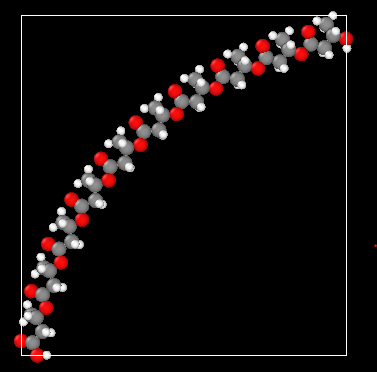

We can see that our polymer has been generated 'correctly'. In this case all of the bonds and atoms are in the correct places - **but** it is not linear. In some cases this may not be an issue, but for building surfaces/fibres of a polymer - straight polymers are much better. This issue occurs because of a dihedral angle somewhere in a polymeric unit not being set at the correct angle. <br>

To fix this you need to open a second of instance of ubuntu and activate the AmberTools23 environment: <br>

    '''shell
    conda activate AmberTools23
    '''

Then launch xleap: <br>

    '''shell
    xleap
    '''

Now load the .prepi files for the head, mainchain and tail unit.

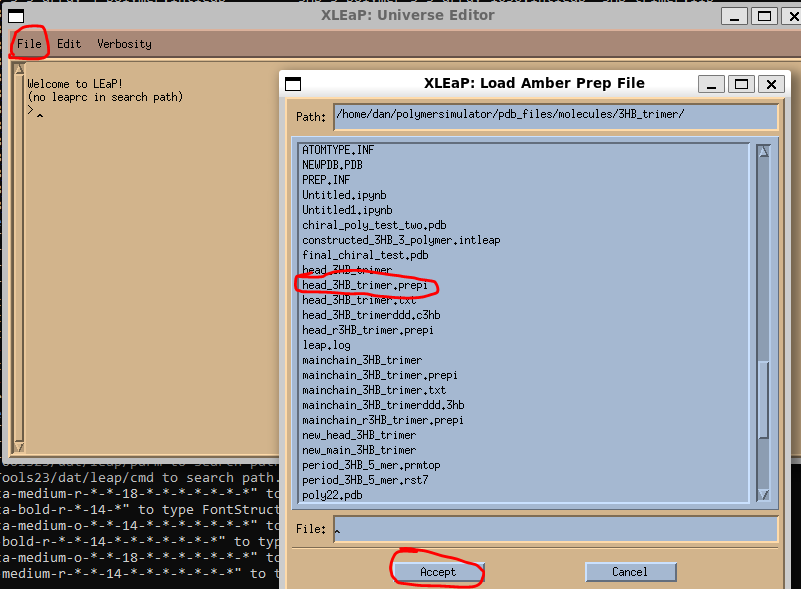

In xleap you can see what units are loaded with the **list** command:

    '''shell
    list
    '''

In this case, this fix is relatively simple as there are only 4 atoms in the backbone of the polymer but in any case, the most important dihedral angle is in the mainchain unit. To edit the angle click **edit** in the menu and select the code for the mainchain unit. Then right click and drag across the entire unit and select **Display** --> **Names** (we need to know the exact names and number of the atoms forming the backbone of the unit - you will need to figure this out yourself for other cases!!)

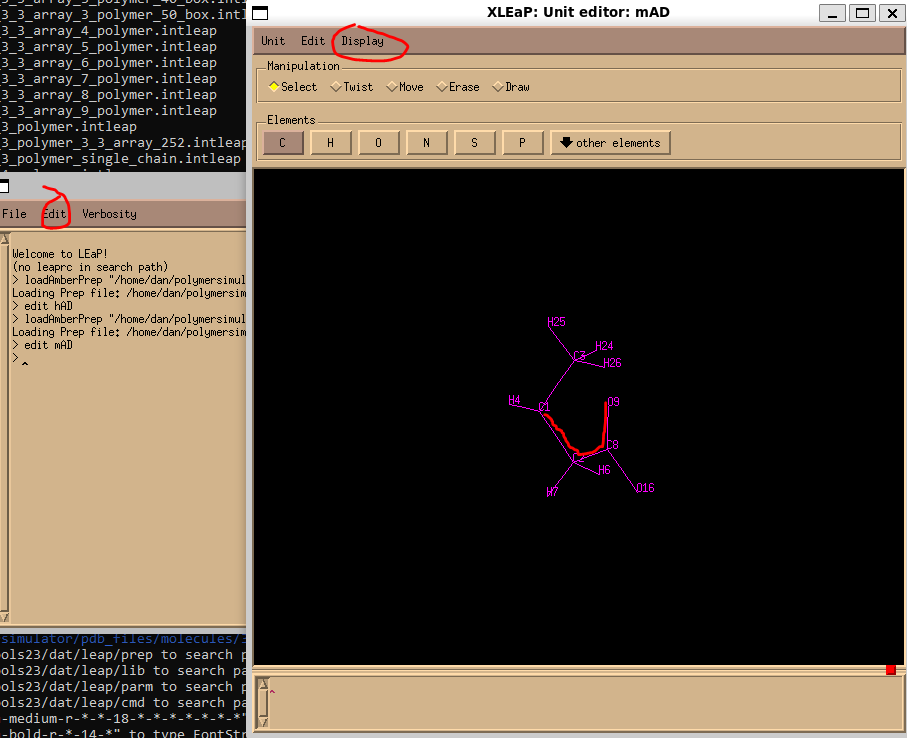

For this example the backbone atoms have been highlighted in red. The next step is to impose a 180 degree angle on the polymeric unit with the lines shown below.

    '''shell
    source leaprc.gaff # Load gaff forcefield
    tut_3HB_main = copy mAD # Create a new unit which is a copy of the original
    impose tut_3HB_main {{1 10}} {{"O9" "C8" "C2" "C1" 180.0}} # Impose a dihedral angle of 180 degrees on the backbone atoms
    '''

Now save this unit as an amber prep file by overwriting the original **mainchain_3HB_trimer.prepi** file. (the file needs to be this name so the rest of the code can find and use this polymeric unit).


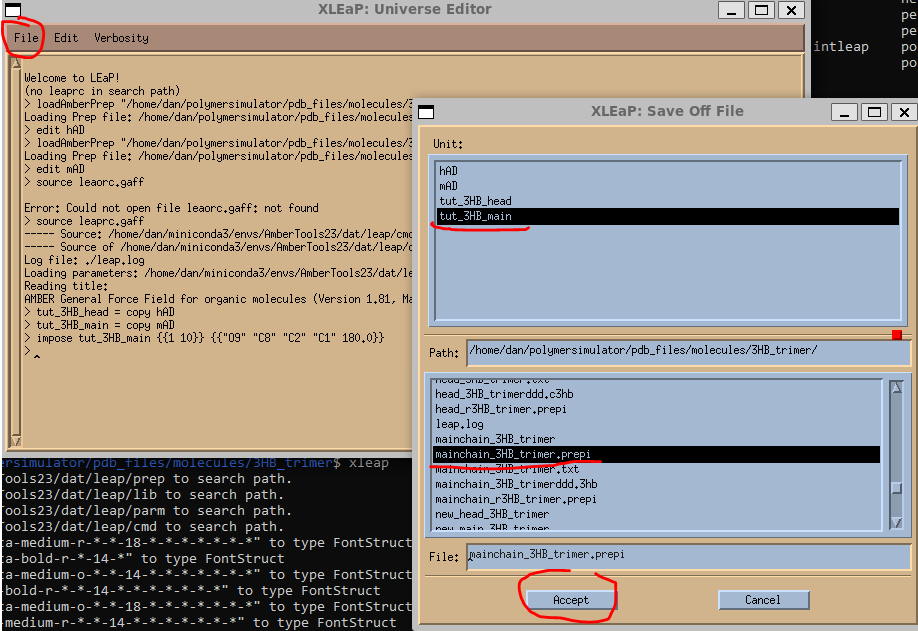 

You will need to do this process for the head and tail units also, but it is exactly the same - just change the four atom names involved in the dihedral to those specific to the unit.

Now we can test building the polymer again as before.

In [17]:
# Method for generating polymer pdbs

# Example Usage:
# output = builder.gen_polymer_pdb("3HB_trimer", 10)"

output = builder.gen_polymer_pdb("3HB_trimer", 10)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

Now lets visualise the polymer with new imposed dihedral angles.

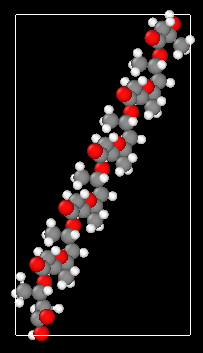

The polymer is no longer bendy :))

# Making different length polymers

Once the first polymer generated is correct (and linear), it is easy to generate polymers of any length.

In [19]:
# Generate a 3HB 20-mer

output = builder.gen_polymer_pdb("3HB_trimer", 20)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_20_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_20_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

Lets visualise the 20-mer

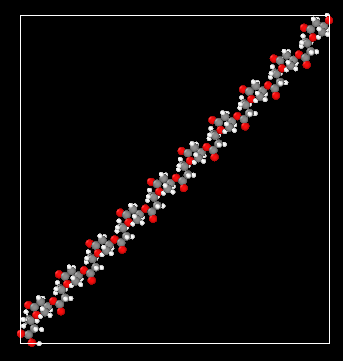

A 100-mer can even be built!

In [20]:
# Generate a 3HB 100-mer

output = builder.gen_polymer_pdb("3HB_trimer", 100)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_100_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_100_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/A

Now lets visualise the 100-mer!

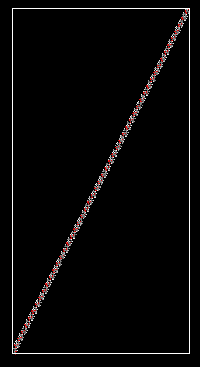

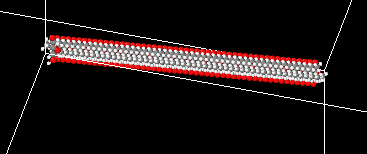

Its getting hard to see now... xD